# Week 8 - Other libraries and cool things


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [seaborn](https://seaborn.pydata.org/index.html)

`seaborn` is a Python data visualisation library for making statistical graphics. It is built on top of `matplotlib` and integrates very closely with `pandas`. 

Exploratory visualisations are often much easier with `seaborn`. For example, with only a few lines of code, we can visualise 5 columns from the titanic dataset.

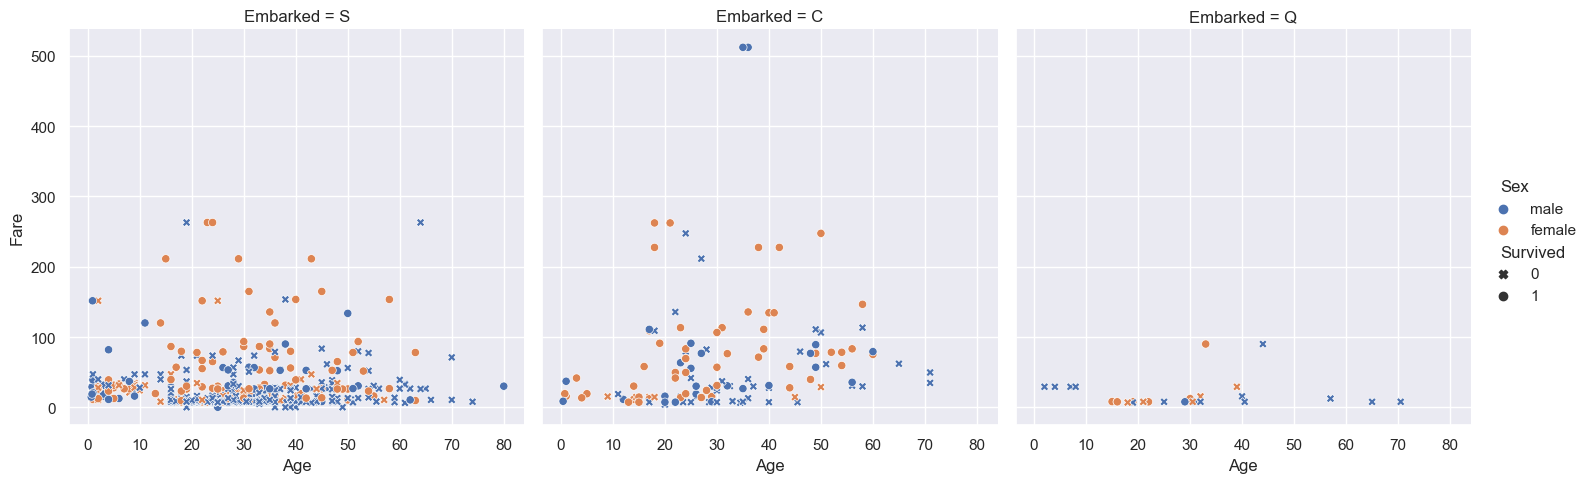

In [71]:
sns.set_theme(context='notebook', style='darkgrid')

df = pd.read_csv('../data/titanic.csv')

ax = sns.relplot(
    data=df, 
    x='Age', y='Fare', col='Embarked',
    hue='Sex', 
    style='Survived',
    markers={0: 'X', 1: 'o'},
);

## Matplotlib figure anatomy

A `matplotlib` figure is a collection of `Artist` objects stored together in a logical parent-child hierarchy. Here's a neat way to visualise it.

Figure(600x600)
    Rectangle(xy=(0, 0), width=1, height=1, angle=0)
    AxesSubplot(0.125,0.11;0.775x0.77)
        Line2D(A diaganol line)
        Annotation(50, 50, 'This is the halfway point')
        Spine
        Spine
        Spine
        Spine
        XAxis(75.0,65.99999999999999)
            Text(0.5, 0, 'The x-axis')
            Text(1, 0, '')
                Line2D()
                Line2D()
                Line2D()
                Text(0, 0, '')
                Text(0, 1, '')
                Line2D()
                Line2D()
                Line2D()
                Text(0, 0, '')
                Text(0, 1, '')
                Line2D()
                Line2D()
                Line2D()
                Text(0, 0, '')
                Text(0, 1, '')
                Line2D()
                Line2D()
                Line2D()
                Text(0, 0, '')
                Text(0, 1, '')
                Line2D()
                Line2D()
                Line2D()
                Text(

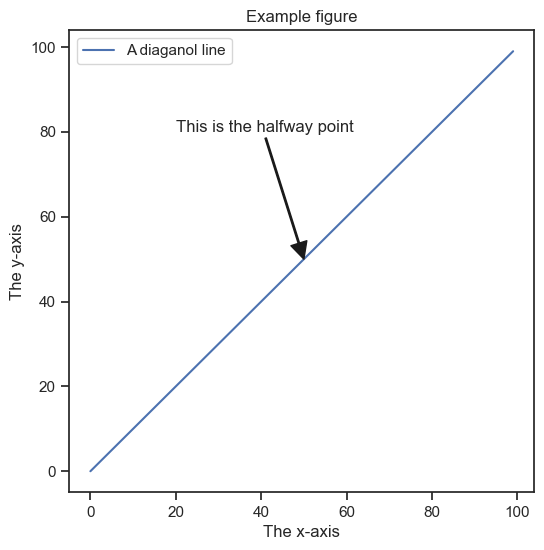

In [45]:
from matplotlib.artist import Artist

# Make a basic example figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(range(100), range(100), label='A diaganol line')
ax.set(
    xlabel='The x-axis',
    ylabel='The y-axis',
    title='Example figure'
)
ax.legend()
ax.annotate(
    text='This is the halfway point', 
    xy=(50, 50), 
    xytext=(20, 80),
    arrowprops={'width':1, 'facecolor':'k', 'edgecolor':'k'}
)

# A function to plot all of the Artists
def recursive_get_children(artist, depth=0):
    if isinstance(artist, Artist):
        print('  ' * depth + str(artist))
        for child in artist.get_children():
            recursive_get_children(child, depth + 2)

# Call the function on our figure
recursive_get_children(fig)

Now, to demonstrate the power of matplotlib, let's traverse this hierarchy in true object-oriented fashion and make some changes to a single element.

In [1]:
fig.axes[0].get_xticklabels()[4].set(
    color='r', 
    style='italic', 
    weight='bold', 
    size=42,
    family='Comic Sans MS'
)

fig

NameError: name 'fig' is not defined

This may seem like a silly exercise, but it reveals much about `matplotlib`. What else about the plot can you change?

## Animations with matplotlib

With `matplotlib`, it is also possible to make animated plots. Here's one that shows the number of cycling accidents over time. Note you may need to install some additional libraries for this to work in a Jupyter notebook. 

In [53]:
df

Gender,Female,Male,Other
Year,,,
1979,4374.0,18114.0,2.0
1980,4723.0,18838.0,7.0
1981,5041.0,19000.0,11.0
1982,5819.0,21048.0,NaN
1983,6056.0,23126.0,NaN
1984,6380.0,23071.0,NaN
1985,5610.0,20019.0,1.0
1986,5594.0,19278.0,2.0
1987,5403.0,19550.0,3.0


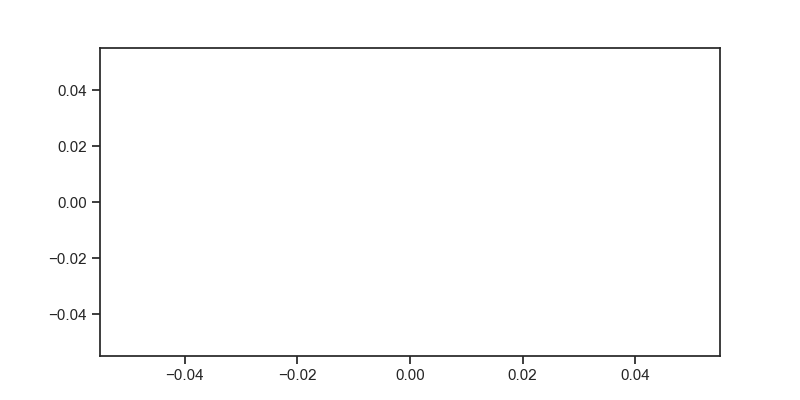

In [50]:
from matplotlib.animation import FuncAnimation
%matplotlib widget

df = (
    pd.read_csv('../data/gb_cycling_accidents.csv')
    .assign(index=lambda df_: pd.DatetimeIndex(df_.Date + ' ' + df_.Time))
    .set_index('index')
    .assign(Year=lambda df_: df_.index.year)
    .groupby(['Year', 'Gender'])['Accident_Index']
    .count()
    .unstack()
)

fig, ax = plt.subplots(figsize=(8, 4))

ln_male, = ax.plot([], [], 'ro-')
ln_female, = ax.plot([], [], 'bo-')
ln_other, = ax.plot([], [], 'go-')

def init():
    ax.set_ylim(-1000, df.Male.max()*1.05)
    ax.set_xlim((df.index.min(), df.index.max()))
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of accidents')
    ax.set_title('Cycling accidents in Great Britain (1979-2018)')
    ax.legend([ln_male, ln_female, ln_other], ['Males', 'Females', 'Other'])
    return ln_male, ln_female, ln_other,

def update(frame):
    data = df.iloc[0:frame]
    ln_male.set_data(data.index, data.Male)
    ln_female.set_data(data.index, data.Female)
    ln_other.set_data(data.index, data.Other)


    return ln_male, ln_female, ln_other,

ani = FuncAnimation(fig, update, frames=len(df.index.to_numpy()),
                    init_func=init, blit=True)
plt.show()

# Geographical plots with `cartopy`

Map projections:

  - https://en.wikipedia.org/wiki/Map_projection
  - https://en.wikipedia.org/wiki/Equirectangular_projection
  - https://en.wikipedia.org/wiki/List_of_map_projections
  
There are various libraries for plotting geospatial data in Python. A good example is the [`cartopy`](https://scitools.org.uk/cartopy/docs/latest/) library. Here, I use `cartopy` to plot the night-time shading for the current time on a flat map of the earth, along with the location of the University of York, and the 10 most populated cities. 

The city data are freely available at the following web page:

  - https://simplemaps.com/data/world-cities
  

In [4]:
import pandas as pd

# Load the city data
df = (
    pd.read_csv('../data/worldcities.csv')
    .sort_values('population', ascending=False)
    .head(100)
)
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
95,Nanchong,Nanchong,30.7991,106.0784,China,CN,CHN,Sichuan,minor,6278614.0,1156762337
96,Zunyi,Zunyi,27.7050,106.9336,China,CN,CHN,Guizhou,NaN,6270700.0,1156539782
97,Qujing,Qujing,25.5102,103.8029,China,CN,CHN,Yunnan,NaN,6155400.0,1156747998
99,Xinyang,Xinyang,32.1264,114.0672,China,CN,CHN,Henan,NaN,6109106.0,1156273453


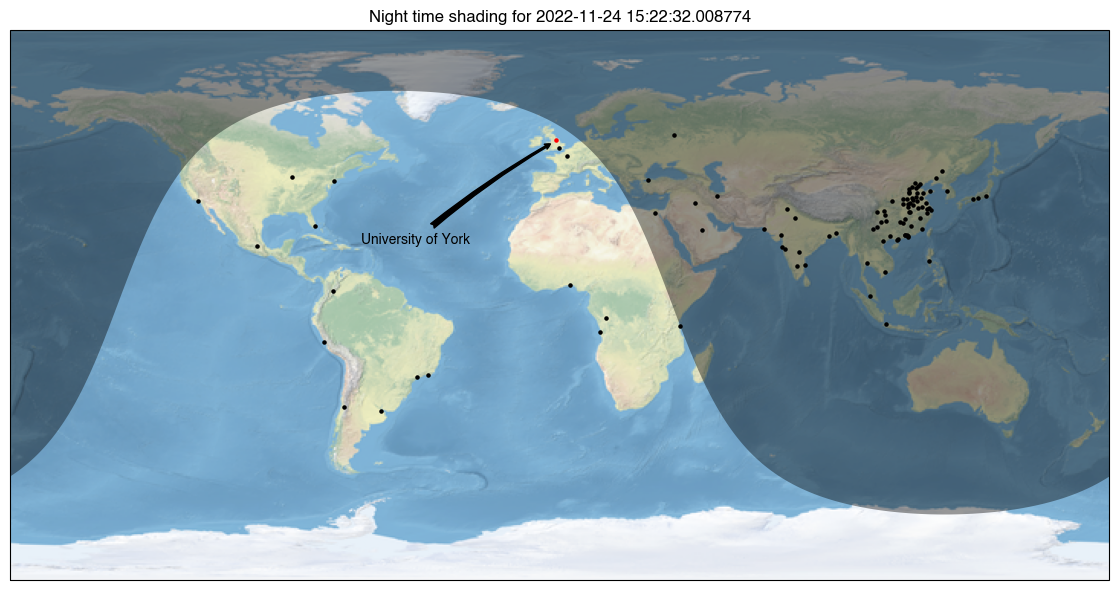

In [5]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade

# Create a figure with a GeoAxes by specifying 
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Get current date and time
dt = datetime.datetime.now()

# Location of University of York
location = (-1.0311947681813436, 53.94930227196749)

# Arrow props
arrowprops=dict(
    arrowstyle='fancy',
    shrinkA=5,
    shrinkB=5,
    fc="k", ec="k",
    connectionstyle="arc3,rad=-0.05",
)

# Add title
ax.set_title(f'Night time shading for {dt}')

# Draw a standard flat map of the world
ax.stock_img()

# Add the nightshade feature
ax.add_feature(Nightshade(dt, alpha=0.4))

# Add University of York location and annotate
ax.scatter(*location, c='r', s=5)
ax.annotate(
    text='University of York', 
    xy=location,
    xytext=(-65, 20),
    arrowprops=arrowprops
)

# Plot the city locations
ax.scatter(df.lng, df.lat, c='k', s=5)

# Annotate with the names of the cities
# for idx, row in df.iterrows():
#     ax.annotate(
#         text=row.city,
#         xy=(row.lng+1, row.lat+1)
#     )
    
plt.tight_layout()
plt.show()

`matplotlib` has its own [Basemap Toolkit](https://matplotlib.org/basemap/users/index.html) which predates `cartopy`. Soon I'll be off to Copenhagen, so I decided to use it to plot the [great circle](https://en.wikipedia.org/wiki/Great_circle) route between airports.

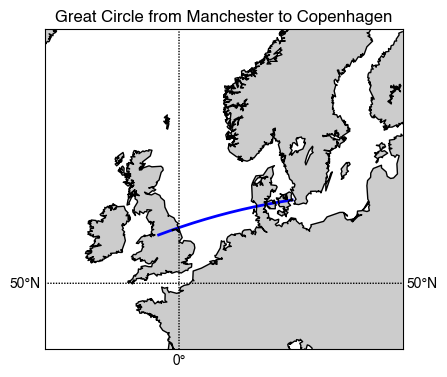

In [12]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# create new figure, axes instances.
fig=plt.figure(figsize=(12, 4))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# setup mercator map projection.
m = Basemap(
    llcrnrlon=-15.,llcrnrlat=45.,urcrnrlon=25.,urcrnrlat=65.,
    rsphere=(6378137.00,6356752.3142),
    resolution='l',projection='merc',
    lat_0=40.,lon_0=-20.,lat_ts=20.
)

# lat/lon for manchester and copenhagen
cop_lat, cop_lon = 55.62798787190983, 12.643942953245418
man_lat, man_lon = 53.35544507391249, -2.277185420260674

# draw great circle route between manchster and copenhagen
m.drawgreatcircle(cop_lon,cop_lat,man_lon,man_lat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()

# draw parallels
m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])

# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

ax.set_title('Great Circle from Manchester to Copenhagen')
plt.show()